Twin sisters Lilly and Lucie Johnson shared most of their experiences growing up in Wisconsin, but they went separate ways to earn a degree — Lilly at the University of South Alabama and Lucie at Western Michigan University. Now those schools are meeting up Saturday, 2024 December 14 as the Jags face the Broncos in the IS4S Salute to Veterans Bowl in Montgomery, Alabama.

"We figured this was a once-in-a-lifetime opportunity," said Cliff. "Both teams must win at least six games just to become bowl eligible. Then for our only two children to be one at Western Michigan and one at South, it just blew my mind. What are the actual odds?"

***Challenge accepted!***

## A Naive Approach

In the 2024-25 football season, there will be
[$82$ FBS schools with teams playing in a post-season game](https://en.wikipedia.org/wiki/2024%E2%80%9325_NCAA_football_bowl_games)
(either a playoff game or bowl game).
A simple analysis would suggest that if our twins Lucie and Lilly attended different schools, randomly chosen among these $82$, there would be
a $1$ out of $81$ chance their schools would face off against each other, or about $1.22\%$. (It doesn't matter which school Lucie goes to: she
only matches up with Lilly provided Lilly attends the one of the remaining $81$ schools that was scheduled to play Lucie's team.)

## Victory for Fansville

However, the fans are the true winners this year, as we have finally gotten an expanded [12-team College Football Playoff](https://en.wikipedia.org/wiki/2024%E2%80%9325_College_Football_Playoff)! This means our twins will have a slightly greater chance to wave at each other across the stadium, if their teams are lucky enough to make the bracket.

![bracket](./bracket.png)

The analysis actually would vary a bit if you assume a few dark horse victories, but for simplicity, we won't root for the underdogs today. This means that Seeds 9 though 12 only see one team in the post season, Seeds 3 through 8 all encounter two teams, and our top two Seeds face off against three teams.

As I tell my students, let's be adults and use technology before we make a mistake. The code below shows the details, but we now see that we've bumped up the odds just slightly to $46$ out of $6642$, or about $1.39\%$.

In [1]:
from IPython.display import display, Math, Markdown
from random import sample
from matplotlib import pyplot

In [2]:
# There is a 70 out of 82 chance Lucie's team doesn't make the playoff. In this case, there's a 1 out of 81 chance Lilly's team is her opponent.
scenarioA = (70/82) * (1/81)
display(Markdown("#### Scenario A"))
display(Math(f"{scenarioA*100:.2f}\\% \\text{{, or {70*1} out of {81*82}}}"))

#### Scenario A

<IPython.core.display.Math object>

In [3]:
# There is a 4 out of 82 chance Lucie's team is seeded 9 through 12. In that case, there's still only a 1 out of 81 chance Lilly's team is her opponent.
scenarioB = (4/82) * (1/81)
display(Markdown("#### Scenario B"))
display(Math(f"{scenarioB*100:.2f}\\% \\text{{, or {4*1} out of {81*82}}}"))

#### Scenario B

<IPython.core.display.Math object>

In [4]:
# There is a 6 out of 82 chance Lucie's team is seeded 3 through 8. Now there's a 2 out of 81 chance Lilly's team is one of her opponents.
scenarioC = (6/82) * (2/81)
display(Markdown("#### Scenario C"))
display(Math(f"{scenarioC*100:.2f}\\% \\text{{, or {6*2} out of {81*82}}}"))

#### Scenario C

<IPython.core.display.Math object>

In [5]:
# Finally we have a 2 out of 82 chance Lucie's team is seeded 1 or 2. Then there's a 3 out of 81 chance Lilly's team is one of her opponents.
scenarioD = (2/82) * (3/81)
display(Markdown("#### Scenario D"))
display(Math(f"{scenarioD*100:.2f}\\% \\text{{, or {2*3} out of {81*82}}}"))

#### Scenario D

<IPython.core.display.Math object>

In [6]:
# This covers all scenarios, so our overall chances are the sum of these.
overall = scenarioA + scenarioB + scenarioC + scenarioD
display(Markdown("### Chances to meet in post-season, assuming FBS schools who make bowls"))
display(Math(f"{overall*100:.2f}\\% \\text{{, or {70*1 + 4*1 + 6*2 + 2*3} out of {81*82}}}"))

### Chances to meet in post-season, assuming FBS schools who make bowls

<IPython.core.display.Math object>

We may also run an computational experiement to simulate these odds: note how the graph stabalizes at around $1.39\%$.

In [7]:
TEAMS = 82
TRIALS = 100_000
PREDICTION = 1.39
PRECISION = 2
def simulate_meetup(teams=TEAMS, trials=TRIALS, prediction=PREDICTION, precision=PRECISION):
    bowl_seeds = range(13,82+1)
    MATCHUPS = list(zip(bowl_seeds[::2], bowl_seeds[1::2])) # regular bowl games
    MATCHUPS += [(8,9), (7,10), (6,11), (5,12)] # first round
    MATCHUPS += [(4,5), (3,6), (2,7), (1,8)] # quarterfinals
    MATCHUPS += [(1,4), (2,3)] # semifinals
    MATCHUPS += [(1,2)] # championship
    meetups = 0
    points = []
    for trial in range(trials):
        lilly_rank, lucie_rank = sample(range(1,teams+1), 2)
        if tuple(sorted([lilly_rank, lucie_rank])) in MATCHUPS:
            meetups += 1
        points += [(trial+1,meetups/(trial+1)*100)]
    _, ax = pyplot.subplots()
    ax.plot(*zip(*points))
    ax.plot([0,trials], [prediction, prediction])
    ax.annotate(f"{prediction:.{precision}f}%", (trials,prediction*1.05), ha='center')
    pyplot.xlabel("Trials")
    pyplot.ylabel("Percentage of Successful Trials")
    pyplot.ylim(0, prediction*2)
    pyplot.show()

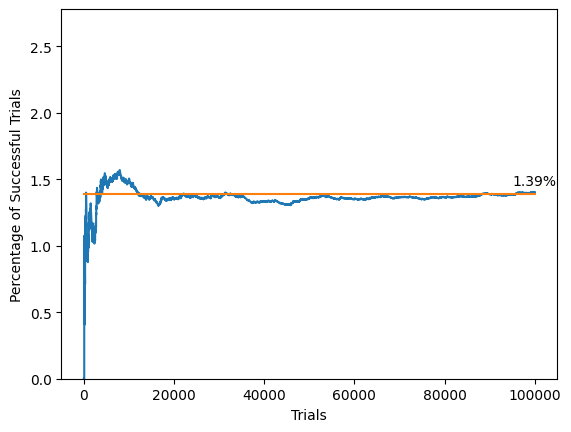

In [8]:

simulate_meetup(teams=82, trials=100_000, prediction=1.39)

## Not Everyone Makes the Post-Season

But the sad truth, which hits home especially for this Auburn alum, is that not every FBS team makes it to a bowl, much less the playoffs. So what if Lucie and Lilly did not just attend random schools who made it to the post-season?

There are [$134$ teams playing FBS football this season](https://en.wikipedia.org/wiki/2024_NCAA_Division_I_FBS_football_season). So we can modify the previous calculation by first calculating the chances both girls happened to be enrolled at one of the $82$ schools who sent a team to the post-season.

In [9]:
# Lucie has a 82 out of 134 chance to be in a post-season team, and then Lilly has an 81 out of 133 chance to be at another such school.
lucie_makes_postseason = 82 / 134
lilly_makes_postseason = 81 / 133
chances_meeting_in_postseason = 92 / 6642
overall_chances = lucie_makes_postseason * lilly_makes_postseason * chances_meeting_in_postseason
display(Markdown("### Chances to meet in post-season, assuming FBS schools"))
display(Math(f"{overall_chances*100:.2f}\\% \\text{{, or around {82*81*92 // 100000} out of {134*133*6642 // 100000}}}"))

### Chances to meet in post-season, assuming FBS schools

<IPython.core.display.Math object>

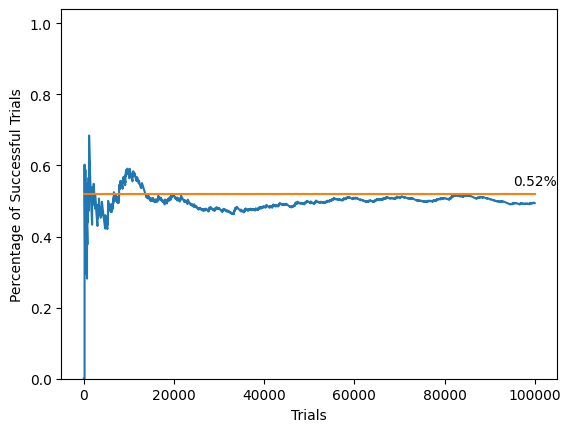

In [10]:
simulate_meetup(teams=134, trials=100_000, prediction=0.52)

Already our twins have found themselves in a rare scenario! But what if we sent a step further? According to the [National Center for
Education Statistics](https://nces.ed.gov/fastfacts/display.asp?id=1122), there were $2637$ four-year colleges offering classes the 2020-2021 academic year. So what happens if we only assume Lucie and Lilly chose a random four-year college to attend?

In [11]:
# Lucie has a 82 out of 2637 chance to be in a post-season team, and then Lilly has an 81 out of 2636 chance to be at another such school.
lucie_makes_postseason = 82 / 2637
lilly_makes_postseason = 81 / 2636
chances_meeting_in_postseason = 92 / 6642
overall_chances = lucie_makes_postseason * lilly_makes_postseason * chances_meeting_in_postseason
display(Markdown("### Chances to meet in post-season, assuming Title IV four-year, degree-granting institutions"))
display(Math(f"{overall_chances*100:.4f}\\% \\text{{, or around {82*81*92 // 100000} out of {2637*2636*6642 // 100000}}}"))

### Chances to meet in post-season, assuming Title IV four-year, degree-granting institutions

<IPython.core.display.Math object>

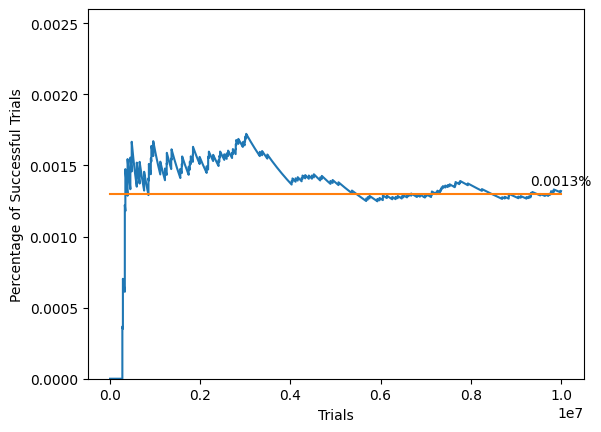

In [12]:
simulate_meetup(teams=2637, trials=10_000_000, prediction=0.0013, precision=4)

With the probability sitting at just over a thousandth of a percent, we're not quite looking at a once-in-a-million situation, but I think it's still safe to say that Lucie and Lilly get to enjoy a rare matchup nonetheless!

# Go Jags!

![football](./football.jpg)

### About the Author

[Dr. Steven Clontz](https://clontz.org) is an Associate Professor of Mathematics at the University of South Alabama whose research interests include game theory, so he comes by this over-analysis honestly.